# GEOL157 lab 6: Attributing Climate Change

## Introduction

In this lab we will answer the question of how much of recent warming can be blamed on human activities. As we saw in class, a key part of this logical argument rests upon model simulations of the climate of last 150 years. The model results are from the Coupled Model Intercomparison Project Phase 5 ([CMIP5](https://cmip.llnl.gov/cmip5/)), which is one of the scientific bases for IPCC Fifth Assessment Report (2013). The idea is to subject climate models to different forcings and see the pattern and magnitude of their responses. Forcings include greenhouse gases, anthropogenic aerosols, solar insolation, volcanic activities, land use and also on. Forcings like greenhouse gases and anthropogenic aerosols are anthropogenic, while forcings like volcanic activities are natural. How do they stack up?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Detection and Attribution in the CMIP5 ensemble

About 20 modelling groups in the world participate in CMIP5, and each modelling group may have a few climate models. For each experiment, models are not just run once. Multiple runs are done that differ only slightly in their starting point. Thus, differences between these runs illustrate the range of “natural” climate variability: that is, the depict many plausible histories that climate could have followed. One consequence of this is that you cannot expect a given simulation to match osbervations *exactly*; instead, we seek combinations of forcings and models that well-reproduce trends, or certain events (e.g. volcanic cooling). 

We start by reading in global mean near-surface temperature time series forced by all forcings and natural forcings in CMIP5 models. The simulations with all forcings are part of the so-called "historical" experiment, which aimed to reproduce the climate over 1851-2005. Simulations exposed only to natural forcings are called "historicalNat" experiment. Here temperature is defined as anomalies relative the 1850-1880 average for each simulation.

In [2]:
# Temperature response by All forcings
df_all = pd.read_pickle('tas_ann_cmip5_historical.pkl')

In [3]:
df_all

,Year,ACCESS1-0,ACCESS1-3,CCSM4,CESM1-BGC,CESM1-CAM5,CMCC-CMS,CNRM-CM5,CSIRO-Mk3-6-0,CanESM2,...,MIROC-ESM-CHEM,MIROC5,MPI-ESM-LR,MPI-ESM-MR,MRI-CGCM3,NorESM1-M,NorESM1-ME,bcc-csm1-1,bcc-csm1-1-m,inmcm4
0,1850,0.005912,-0.090138,0.000328,0.032450,0.041840,-0.024983,-0.038497,-0.105936,-0.006133,...,-0.023172,-0.042174,0.031862,0.074906,-0.098591,-0.038457,0.171138,-0.063076,-0.353140,-0.037016
1,1851,-0.081942,0.081735,0.081337,-0.049950,0.026731,0.196026,-0.059678,-0.033881,-0.004424,...,0.101046,-0.033038,0.031071,0.053088,-0.059391,-0.091666,0.195029,-0.166249,-0.266049,-0.007625
2,1852,-0.081842,-0.003265,-0.025781,-0.216741,0.000412,0.020135,-0.018497,0.028810,0.035603,...,0.049501,-0.048038,-0.014229,0.057443,-0.053328,0.017716,-0.020271,-0.120713,-0.319922,-0.067189
3,1853,0.119176,0.085608,0.020137,-0.105177,0.061067,-0.116801,0.126858,0.004928,0.053731,...,0.137610,0.058180,-0.018820,0.064770,-0.035837,-0.114511,-0.142171,0.003242,-0.156840,0.011602
4,1854,0.140703,0.200480,-0.139636,-0.017277,-0.025097,-0.006719,-0.186660,0.014873,0.164294,...,0.091219,-0.006702,-0.005611,0.073997,-0.052046,-0.093875,-0.034708,-0.068431,0.015642,-0.035816
5,1855,0.109676,-0.053574,-0.016299,0.109778,-0.103088,0.037190,-0.065115,0.037510,0.087994,...,-0.036772,-0.010502,-0.097284,0.101952,-0.053182,-0.060620,0.065174,-0.071149,-0.126767,-0.058080
6,1856,0.053167,0.011035,0.031328,-0.154813,-0.132788,-0.207247,0.040376,-0.018963,-0.077842,...,-0.011926,-0.012047,-0.092884,-0.051575,-0.166164,-0.166048,-0.076008,-0.102240,0.030551,-0.011789
7,1857,-0.022461,0.023153,-0.005263,-0.256022,-0.056415,-0.031438,-0.074397,-0.171254,-0.099024,...,-0.106517,-0.080592,-0.057066,-0.162203,-0.057428,0.017425,-0.050471,-0.426404,-0.325349,-0.044080
8,1858,-0.069161,-0.156874,-0.072536,-0.142895,-0.049469,0.066590,-0.050724,-0.137454,-0.088724,...,-0.047563,-0.071756,-0.050293,-0.080894,0.069882,0.033325,0.075283,-0.198722,-0.289140,-0.080044
9,1859,-0.129324,-0.122165,-0.067108,0.012832,-0.018160,-0.276092,-0.012697,-0.091281,-0.090497,...,0.000010,-0.121992,-0.062593,-0.001357,0.013909,-0.044248,0.189556,-0.069158,-0.014131,-0.104307


** Question 0** How many simulations are there per model?

**Answer 0**:

In [4]:
# Temperature response by Natural forcings
df_nat = pd.read_pickle('tas_ann_cmip5_historicalNat.pkl')

In [5]:
df_nat

,Year,BNU-ESM,CCSM4,CESM1-CAM5-1-FV2,CNRM-CM5,CSIRO-Mk3-6-0,CanESM2,FGOALS-g2,GFDL-CM3,GFDL-ESM2M,GISS-E2-H,GISS-E2-R,HadGEM2-ES,IPSL-CM5A-LR,IPSL-CM5A-MR,MIROC-ESM,MIROC-ESM-CHEM,MRI-CGCM3,NorESM1-M,bcc-csm1-1
0,1850,-0.043956,0.047525,-0.128310,-0.097586,-0.073213,0.010673,0.070986,NaN,NaN,-0.017733,0.041652,NaN,0.012394,-0.033670,-0.018308,0.072031,-0.066430,-0.055138,-0.048620
1,1851,0.123698,0.002952,-0.085701,-0.068122,0.040596,0.146064,0.067041,NaN,NaN,-0.040952,0.073852,NaN,0.011312,-0.034343,0.013601,0.188085,-0.004275,0.127198,-0.010520
2,1852,-0.001129,-0.020802,0.088462,-0.013068,0.011132,0.132392,0.033477,NaN,NaN,-0.144006,0.154952,NaN,-0.027552,-0.057679,-0.034236,0.214831,0.008597,0.166089,0.021989
3,1853,-0.096529,-0.026948,0.204062,-0.063004,-0.036149,0.066073,0.049559,NaN,NaN,-0.086624,0.023652,NaN,-0.024024,-0.037552,0.027537,0.039512,-0.072130,-0.020029,0.087171
4,1854,-0.132502,-0.118921,-0.032283,-0.117977,-0.107613,0.103637,0.050432,NaN,NaN,-0.041824,0.067688,NaN,-0.011897,-0.071088,0.016692,0.047876,-0.019294,0.002035,0.132608
5,1855,-0.080629,-0.065212,-0.120410,-0.079386,-0.025240,0.038546,-0.022932,NaN,NaN,0.011258,0.092979,NaN,-0.040906,-0.023615,0.157728,0.026185,-0.111403,0.135971,-0.082947
6,1856,0.032498,-0.051421,-0.021528,-0.068950,-0.046795,-0.036408,0.003068,NaN,NaN,-0.078806,0.056915,NaN,-0.059424,-0.089334,-0.038790,0.081949,-0.067775,-0.068665,-0.062520
7,1857,0.000244,-0.086939,-0.080728,-0.074322,-0.171968,-0.049090,0.017232,NaN,NaN,-0.186842,-0.044185,NaN,-0.049442,-0.160579,-0.117408,-0.031360,0.051652,-0.022702,-0.091302
8,1858,-0.143938,-0.043612,-0.060647,-0.048586,-0.123604,-0.129618,-0.024759,NaN,NaN,-0.198888,-0.019458,NaN,-0.194842,-0.117679,-0.169154,0.003440,-0.083575,0.127644,-0.113774
9,1859,0.028580,0.032270,-0.117065,-0.016586,-0.082577,-0.117827,-0.026205,NaN,NaN,-0.045324,-0.029376,NaN,-0.170424,-0.105779,-0.144663,-0.126188,-0.064248,0.120353,-0.046611


Now let's load instrumentally observed temperature datasets to compare with the models 

In [6]:
# observations
# HadCRUT4 global surface temperature
df_Had = pd.read_csv('HadCRUT.4.6.0.0.annual_ns_avg.txt',delim_whitespace=True,header=None)
# GISTEMP global surface temperature
df_GIST = pd.read_csv('GLB.Ts+dSST.csv',delimiter=',',skiprows=1, na_values='***')

Let's plot both sets of simulations, as well as the observations

Text(0,0.5,'Temperature anomaly (K)')

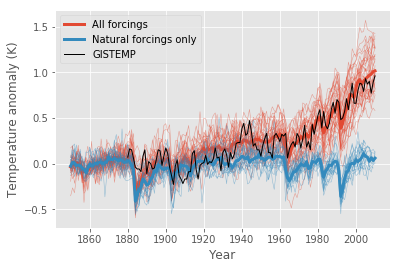

In [7]:
plt.style.use('ggplot')

# All forcings
# median of models
line1,=plt.plot(df_all['Year'],df_all.iloc[:,1:].median(axis=1),linewidth=3,color='C0',label='All forcings')
# time series of each model with thin lines
for i in np.arange(df_all.shape[1]-1):
    plt.plot(df_all['Year'],df_all.iloc[:,i+1],linewidth=0.5,color='C0',alpha=0.5)

# Natural forcings
# median of models
line2,=plt.plot(df_nat['Year'],df_nat.iloc[:,1:].median(axis=1),linewidth=3,color='C1',label='Natural forcings only')
# time series of each model with thin lines
for i in np.arange(df_nat.shape[1]-1):
    plt.plot(df_nat['Year'],df_nat.iloc[:,i+1],linewidth=0.5,color='C1',alpha=0.5)

# observations, with black lines
df_Had_ano = df_Had[1]-df_Had[1][0:30].mean()
#line3,=plt.plot(df_Had[0][0:161],df_Had_ano[0:161],label='observations',linewidth=1,color='black')
df_GIST_ano = df_GIST['J-D']-df_GIST['J-D'][0:30].mean()
line4,=plt.plot(df_GIST['Year'][0:131],df_GIST_ano[0:131],label='GISTEMP',linewidth=1,color='black')

plt.legend(handles=[line1,line2,line4],loc="upper left")
plt.xlabel('Year')
plt.ylabel('Temperature anomaly (K)')

The range spanned by the wiggly lines gives a measure of ther interal variability of the models. That is. for a given forcing in a given year, these lines are meant to protray the range of possible climate states. To simplify the display, we can also show this as 90% central quantiles (i.e. spanning 5% to 95% of the data).

Text(0,0.5,'Temperature anomaly')

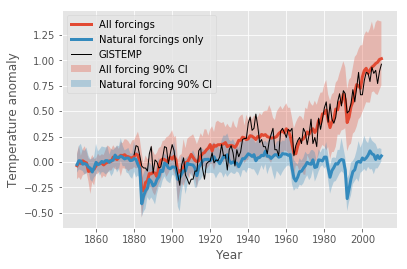

In [8]:
# All forcings
plt.plot(df_all['Year'],df_all.iloc[:,1:].median(axis=1),linewidth=3,color='C0',label='All forcings')
plt.fill_between(df_all['Year'],df_all.iloc[:,1:].quantile(0.05,axis=1),df_all.iloc[:,1:].quantile(0.95,axis=1),label='All forcing 90% CI',alpha=0.3)
# Natural forcings
plt.plot(df_nat['Year'],df_nat.iloc[:,1:].median(axis=1),linewidth=3,color='C1',label='Natural forcings only')
plt.fill_between(df_nat['Year'],df_nat.iloc[:,1:].quantile(0.05,axis=1),df_nat.iloc[:,1:].quantile(0.95,axis=1),label='Natural forcing 90% CI',alpha=0.3)

# observations
#line3,=plt.plot(df_Had[0][0:161],df_Had_ano[0:161],label='HadCRUT4',linewidth=1,color='black')
line4,=plt.plot(df_GIST['Year'][0:131],df_GIST_ano[0:131],label='GISTEMP',linewidth=1,color='black')

plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Temperature anomaly')

**Question 1**: Which experiment is more consistent with observations? Based on this, will you attribute the climate change to natural forcings or anthropogenic forcings?

**Answer 1**:

**Question 2**: When answering Question 1, what's your standard of "consistent" when comparing curves?

**Answer 2**:

**Question 3**: The decrease of temperature in the early 1990s corresponds to a very large volcanic eruption event. What mechanism do you think can explain that the volcanic eruption causes global temperature decrease?

**Answer 3**:

An important question is: "When did man-made climate change emerged from the background of natural variability, both internally-genrerated (e.g. El Niño) and externally-forced?". Let us compare the probability distribution of temperature anomalies in these two experiments year by year and try to find when the probability distributions of these cease to overlap. 

First let's calculate the Kernel Density Function of temperature anomaly in each year.

In [9]:
# Kernel Density Function
kde_all = {}
kde_nat = {}

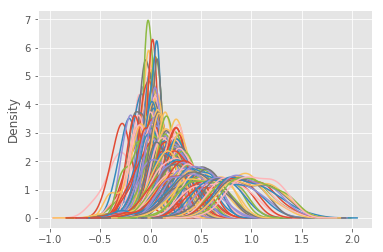

In [10]:
for i in np.arange(1850,2011):
    kde_all[i] = {}
    ax=df_all.iloc[i-1850,1:].plot.kde()
    kde_all[i]['x']=ax.get_children()[i-1850]._x
    kde_all[i]['y']=ax.get_children()[i-1850]._y

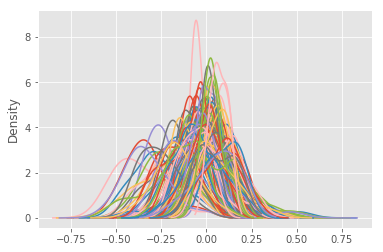

In [11]:
for i in np.arange(1850,2011):
    kde_nat[i] = {}

    ax=df_nat.iloc[i-1850,1:].plot.kde()
    kde_nat[i]['x']=ax.get_children()[i-1850]._x
    kde_nat[i]['y']=ax.get_children()[i-1850]._y

In [12]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [13]:
def pltkde(year):
    plt.plot(kde_all[year]['x'],kde_all[year]['y'],label='All forcings')
    plt.plot(kde_nat[year]['x'],kde_nat[year]['y'],label='Natural forcings')
    plt.xlabel('Temperature anomaly')
    plt.ylabel('Probability')
    plt.legend()

Please run these commands in your teminal if the slider doesn't show:

-  pip install ipywidgets

-  jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [14]:
interact(pltkde, year=(1850, 2010, 1))

interactive(children=(IntSlider(value=1930, description='year', max=2010, min=1850), Output()), _dom_classes=('widget-interact',))

<function __main__.pltkde>

**Question 4**: Please change the year in the slider, when do you think temperature response in the "all forcings" experiment seperates from that in the "natural forcings" experiment?

**Answer 4**:

Each category (natural or anthropogenic) includes several kinds, such as greenhouse gases, anthropogenic aerosols, solar irradiance, and volcanic activity. By using climate models, we can seperate the contribution of each forcing to climate change. Here we will analyze the model output from the GISS model [[Marvel et al. (2016)](https://www.nature.com/articles/nclimate2888)] to see the contribution of different forcings.

Let's read the response of ocean heat content by different forcings. In Marvel et al. (2016), to consider the internal variability in the model, multiple runs are done that differ only slightly in their starting point for each forcing experiment. They are indexed R1, R2, etc

In [15]:
ohc = pd.read_csv('ohc.Marvel_etal2015.csv')

In [16]:
ohc

,Year,All forcings Ensemble Mean,All forcings R1,All forcings R2,All forcings R3,All forcings R4,All forcings R5,All forcings R6,Anthropogenic tropospheric aerosol Ensemble Mean,Anthropogenic tropospheric aerosol R1,...,Solar R2,Solar R3,Solar R4,Solar R5,Volcanic Ensemble Mean,Volcanic R1,Volcanic R2,Volcanic R3,Volcanic R4,Volcanic R5
0,1850,0.595979,1.033132,0.948472,1.245966,0.086574,-0.684885,0.946614,0.381123,0.919550,...,0.996126,1.474749,-0.012580,-0.661525,0.559404,1.169655,1.057983,1.316933,0.124255,-0.871806
1,1851,0.724605,0.917449,1.092046,1.209630,0.290928,-0.256098,1.093674,0.311976,0.617146,...,1.107255,1.576754,-0.101009,-0.425750,0.813444,1.159514,1.412848,1.754281,0.704800,-0.964224
2,1852,0.850923,0.947071,1.149636,1.213727,0.713551,-0.244096,1.325649,0.019951,0.271089,...,1.099878,1.209883,0.264963,-0.717634,0.912322,0.782424,1.833514,1.926378,1.028545,-1.009254
3,1853,1.119904,0.942387,1.913577,1.632057,0.924815,-0.212759,1.519346,0.027390,0.160585,...,1.283580,1.402812,0.630441,-1.047488,0.964464,0.371606,1.978686,2.049416,0.934913,-0.512298
4,1854,1.346502,0.920624,2.134961,1.673247,1.407607,-0.043562,1.986132,0.017271,0.310807,...,1.013352,1.017732,1.009690,-1.274217,1.132118,0.676498,1.723336,2.481678,1.012228,-0.233151
5,1855,1.465347,0.823582,2.495141,1.525199,1.930659,0.041043,1.976459,-0.001526,0.163738,...,0.944504,0.756415,1.192716,-1.450653,1.371950,1.312346,1.782448,2.683812,1.055901,0.025245
6,1856,1.265596,0.377425,2.228259,1.032064,1.700005,0.463278,1.792546,-0.036811,0.001997,...,1.130221,0.898011,1.126720,-1.212441,1.158298,0.663147,1.471572,2.186917,1.196114,0.273740
7,1857,0.362296,-0.566428,1.282317,0.297041,0.920902,-0.542125,0.782066,-0.058569,-0.325708,...,1.334244,0.944272,1.160046,-1.199410,0.166017,-0.610994,0.321966,1.209844,0.489525,-0.580258
8,1858,-0.105018,-0.999640,0.425850,-0.058483,0.764912,-1.245711,0.482964,-0.175956,-0.661579,...,1.324945,0.978124,1.526568,-0.918760,-0.478180,-1.380014,-0.400531,0.505067,0.003525,-1.118946
9,1859,-0.053146,-0.956471,0.634904,-0.557407,1.276617,-1.241151,0.524632,-0.284213,-0.501958,...,1.227867,0.941425,1.732684,-0.923391,-0.528851,-1.617496,-0.115960,0.327730,-0.147876,-1.090655


Name of different forcings.

In [17]:
forcings = ['All forcings', 'Anthropogenic tropospheric aerosol','Greenhouse gases','Land use','Ozone','Solar','Volcanic']

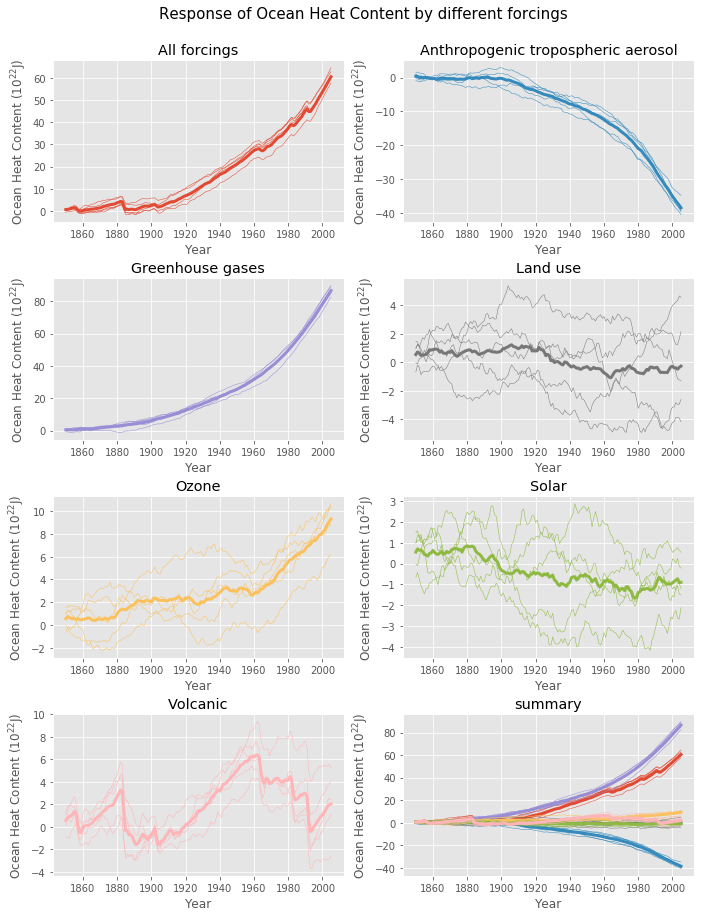

In [18]:
colors = ['C0','C1','C2','C3','C4','C5','C6']

fig, axes = plt.subplots(4,2, figsize=(11.5, 15))
ax=axes.flatten()
for i in np.arange(7):
    ax[i].plot(ohc['Year'],ohc[forcings[i]+' Ensemble Mean'],linewidth=3,color=colors[i])
    for k in np.arange(1,6):
        ax[i].plot(ohc['Year'],ohc[forcings[i]+' R'+str(k)],linewidth=0.5,color=colors[i])
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel(r'Ocean Heat Content ($10^{22}$J)')
    ax[i].set_title(forcings[i])
    
#summary subplot
lines = []
for i in np.arange(7):
    lines+=ax[7].plot(ohc['Year'],ohc[forcings[i]+' Ensemble Mean'],linewidth=3,color=colors[i],label=forcings[i])
    for k in np.arange(1,6):
        ax[7].plot(ohc['Year'],ohc[forcings[i]+' R'+str(k)],linewidth=0.5,color=colors[i])
    ax[7].set_xlabel('Year')
    ax[7].set_ylabel(r'Ocean Heat Content ($10^{22}$J)')
    ax[7].set_title('summary')
    #ax[7].legend(handles=lines,loc="upper left")
fig.suptitle('Response of Ocean Heat Content by different forcings',y=0.93,fontsize=15)
fig.subplots_adjust(hspace=0.35)

**Question 5**: What is the relative contribution of each forcing to ocean heat content (positive or negative)? What's the magnitude of contributions?
-  Anthropogenic tropospheric aerosol
-  Greenhouse gases
-  Land use
-  Ozone
-  Solar
-  Volcanic

**Answer 5**:

Now let's read the temperature response to the same forcings. (tas = "temperature of the air at 2m height") 

In [19]:
tas = pd.read_csv('tas.Marvel_etal2015.csv')

In [20]:
tas

,Year,All forcings Ensemble Mean,All forcings R1,All forcings R2,All forcings R3,All forcings R4,All forcings R5,All forcings R6,Anthropogenic tropospheric aerosol Ensemble Mean,Anthropogenic tropospheric aerosol R1,...,Solar R2,Solar R3,Solar R4,Solar R5,Volcanic Ensemble Mean,Volcanic R1,Volcanic R2,Volcanic R3,Volcanic R4,Volcanic R5
0,1900,0.111148,0.103798,0.162833,0.108305,0.029161,0.122152,0.140640,-0.026012,-0.020009,...,0.010009,0.009537,-0.231299,0.042706,0.087778,0.106602,0.067836,0.085882,0.061631,0.116937
1,1901,0.148344,0.235785,0.157822,0.134350,0.082105,0.103183,0.176822,-0.047284,-0.099281,...,0.008983,-0.065837,-0.044185,0.087776,0.053624,0.026345,0.167107,0.084815,-0.062184,0.052038
2,1902,0.108618,0.162046,0.049158,0.175059,0.018039,0.012236,0.235172,-0.024657,-0.031059,...,0.034285,0.006739,0.010537,0.019686,0.008973,-0.027760,0.096914,-0.031996,-0.057169,0.064874
3,1903,-0.074575,-0.083274,-0.091113,-0.022231,-0.116071,-0.096675,-0.038083,-0.007300,-0.040071,...,0.003604,-0.041466,-0.076995,0.102488,-0.169750,-0.205922,-0.219373,-0.131790,-0.149822,-0.141842
4,1904,-0.044726,-0.010342,-0.068511,-0.084272,-0.015209,-0.053399,-0.036621,-0.045635,-0.178219,...,-0.024222,-0.067896,0.006976,0.090059,-0.113867,-0.104091,-0.104014,-0.090662,-0.097495,-0.173071
5,1905,0.002761,0.023988,0.045473,-0.054548,0.044736,-0.008447,-0.034637,-0.018807,-0.101818,...,-0.020324,0.050933,-0.086893,0.131271,-0.051841,-0.081308,-0.065054,0.010467,-0.053837,-0.069475
6,1906,0.108427,0.016779,0.087650,0.105899,0.155592,0.144794,0.139849,-0.029115,-0.037684,...,-0.094657,0.053972,-0.135065,0.061406,-0.019895,0.022498,-0.086665,-0.035894,0.057003,-0.056417
7,1907,0.092086,0.097540,0.102027,-0.001093,0.159102,0.094263,0.100676,-0.049533,-0.010749,...,-0.069270,0.022075,-0.108526,0.058792,-0.034866,-0.031473,-0.040485,-0.005242,0.051355,-0.148483
8,1908,0.095825,0.119193,0.175224,-0.010094,0.136591,0.050898,0.103137,-0.054159,-0.108851,...,-0.048225,0.029610,-0.048528,0.080663,-0.030233,-0.121289,-0.049787,0.020087,-0.040745,0.040570
9,1909,0.143157,0.131294,0.166989,0.065337,0.168136,0.057891,0.269295,-0.020442,-0.031306,...,-0.010173,-0.009247,-0.002745,0.035430,0.036775,0.023160,0.013336,0.077153,0.025351,0.044873


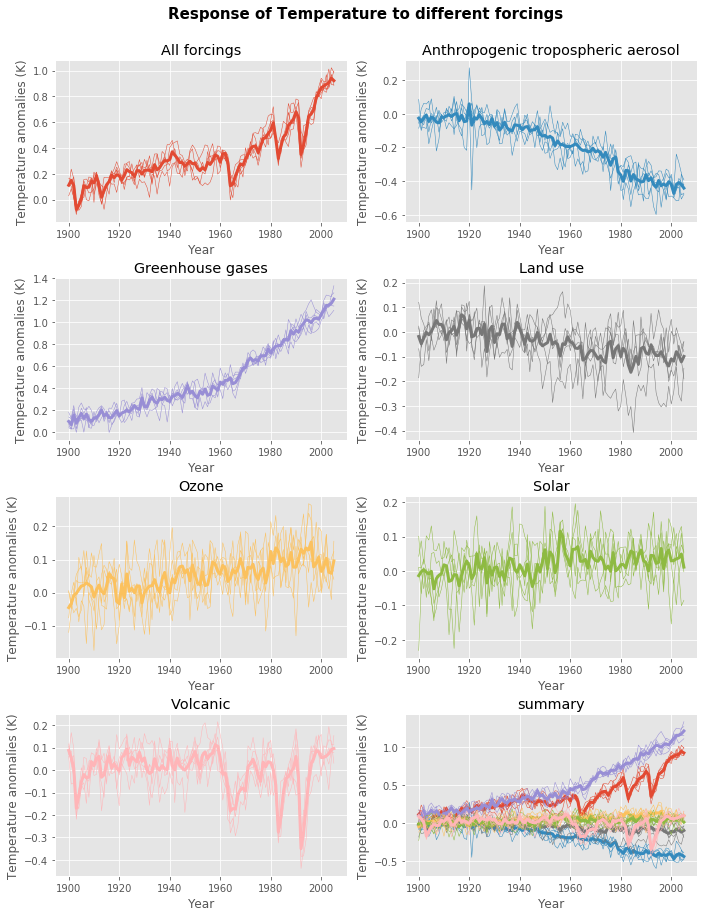

In [21]:
fig, axes = plt.subplots(4,2, figsize=(11.5, 15))
ax=axes.flatten()
for i in np.arange(7):
    ax[i].plot(tas['Year'],tas[forcings[i]+' Ensemble Mean'],linewidth=3,color=colors[i])
    for k in np.arange(1,6):
        ax[i].plot(tas['Year'],tas[forcings[i]+' R'+str(k)],linewidth=0.5,color=colors[i])
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Temperature anomalies (K)')
    ax[i].set_title(forcings[i])
    
#summary subplot
lines = []
for i in np.arange(7):
    lines+=ax[7].plot(tas['Year'],tas[forcings[i]+' Ensemble Mean'],linewidth=3,color=colors[i],label=forcings[i])
    for k in np.arange(1,6):
        ax[7].plot(tas['Year'],tas[forcings[i]+' R'+str(k)],linewidth=0.5,color=colors[i])
    ax[7].set_xlabel('Year')
    ax[7].set_ylabel('Temperature anomalies (K)')
    ax[7].set_title('summary')
    #ax[7].legend(handles=lines,loc="upper left")
fig.suptitle('Response of Temperature to different forcings',y=0.93,fontsize=15,weight='bold')
fig.subplots_adjust(hspace=0.35)

**Question 6**: What is the relative contribution of each forcing to surface temperature (positive or negative)? What is the magnitude of contributions? Do this for:
-  Anthropogenic tropospheric aerosols
-  Greenhouse gaseses
-  Land use
-  Ozone
-  Solar irradiance
-  Volcanic aerosols

**Answer 6**:

**Question 7**: Compare the summary plot of surface temperature to ocean heat content? Which one has more variability (wiggles)? Based on what you learned from the lectures, why is the ocean heat content a better indicator of climate change compared with surface temperature?

**Answer 7**: